Exercice 1 : Entropie

In [3]:
import decisiontree as dt
import math
import collections

def entropie(vect):
    """
    calcule l'entropie d'un objet itérable
    """
    entropy = 0
    labels_dict = collections.Counter(vect)
    for k,v in labels_dict.items():
        entropy-= v/len(vect) * math.log(v/len(vect))
    return entropy    

def entropie_cond(list_vect):
    """
    calcule l'entropie conditionnelle d'une liste d'itérables
    """
    h, nb_elems = 0,0
    for vect in list_vect:
        h += len(vect) * entropie(vect)
        nb_elems += len(vect)
    return h/nb_elems


Question 1.3:

In [4]:
import  pickle
import  numpy as np

# data : tableau (films ,features), id2titles : dictionnaire  id -> titre ,
# fields : id  feature  -> nom
[data , id2titles , fields ]= pickle.load(open("imdb_extrait.pkl","rb"))

# la  derniere  colonne  est le vote
datax=data [: ,:32]
datay=np.array ([1 if x[33] >6.5  else  -1 for x in data])

entropies = [entropie(datax[i]) for i in range(len(datax[0]))]
print(entropies)
print(fields)
#entropies_cond = [entropie_cond(datax[i]) for i in range(len(datax[0]))]
#print(entropies_cond)

#diff_entropies = entropies - entropies_cond



[0.8479942625588093, 0.8479942625588093, 0.6848735471085738, 0.8479942625588093, 0.9606247612828218, 0.8479942625588093, 0.8479942625588093, 0.8479942625588093, 0.9089087348987808, 0.715537563594637, 0.8479942625588093, 0.8479942625588093, 0.9089087348987808, 0.8479942625588093, 0.7752107668722757, 0.6848735471085738, 0.9089087348987808, 0.9089087348987808, 0.9089087348987808, 0.9089087348987808, 0.8479942625588093, 0.8479942625588093, 0.8479942625588093, 0.9606247612828218, 0.9606247612828218, 0.8479942625588093, 0.7752107668722757, 0.7752107668722757, 0.8479942625588093, 0.8479942625588093, 0.8479942625588093, 0.6848735471085738]
{0: 'Sci-Fi', 1: 'Crime', 2: 'Romance', 3: 'Animation', 4: 'Music', 5: 'Comedy', 6: 'War', 7: 'Horror', 8: 'Film-Noir', 9: 'Adult', 10: 'News', 11: 'Reality-TV', 12: 'Thriller', 13: 'Western', 14: 'Mystery', 15: 'Short', 16: 'Talk-Show', 17: 'Drama', 18: 'Action', 19: 'Documentary', 20: 'Musical', 21: 'History', 22: 'Family', 23: 'Adventure', 24: 'Fantasy', 

0.5672552866797471
0.6418138216699367
0.6825812077610639
0.7183344233703945
0.7314148681055156
0.736429038587312
0.7575757575757576
0.7719642467843907
0.7889688249400479
0.8059734030957052
0.8210159145410943
0.8380204926967517
0.8502289077828646
0.8637453673424896
0.8750817527795945
0.8820579899716591
0.8890342271637236
0.8923043383475038
0.8960104643557881
0.8964464791802921
0.8984085458905603
0.8997165903640724
0.9001526051885764
0.9001526051885764
0.9001526051885764
0.9001526051885764
0.9001526051885764
0.9001526051885764
0.9001526051885764
0.9001526051885764
0.9001526051885764


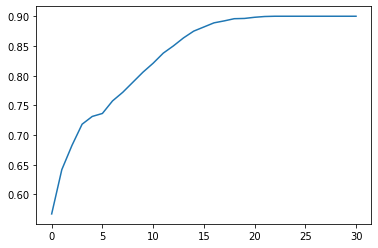

In [5]:

from  decisiontree  import  DecisionTree
import numpy as np
import matplotlib.pyplot as plt

depths = [i for i in range(31)]
scores = []
for depth in depths:
    dt = DecisionTree ()
    dt.max_depth = depth        #on fixe la  taille  de l’arbre a 5
    dt.min_samples_split = 2    #nombre  minimum d’exemples  pour  spliter  un noeud
    dt.fit(datax ,datay)
    dt.predict(datax [: ,:])
    print(dt.score(datax ,datay))
    scores.append(dt.score(datax ,datay))

# dessine l’arbre  dans un  fichier  pdf   si pydot  est  installe.
#dt.to_pdf("/tmp/test_tree.pdf",fields)
# sinon  utiliser  http :// www.webgraphviz.com/
#dt.to_dot(fields)
#ou dans la  console
#print(dt.print_tree(fields ))

######PLOTTING#######

fig, ax = plt.subplots()

plt.plot(depths, scores, label='scores')
plt.show()




# Sur et sous apprentissage

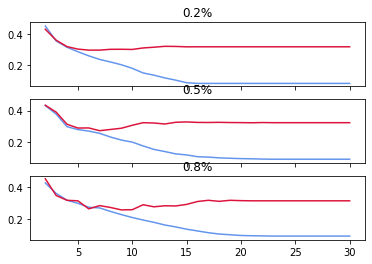

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

partitions = np.arange(0.2, 0.9,0.3)

def split_data(datax, datay, percentage):
    """ 
        Sépare les données en un ensemble d'apprentissage et un ensemble de test
        percentage : pourcentage de données dans l'ensemble d'apprentissage
    """
    size = datax.shape[0] # nombre de données
    indices = np.arange(size)
    np.random.shuffle(indices) # mélange aléatoire des indices
    nb_app = int(size*percentage) # nombre de données d'appentissage
    id_app = indices[0:nb_app] # indices des données d'apprentissage
    id_test = indices[nb_app:] # indice des données de test
    return datax[id_app], datax[id_test], datay[id_app], datay[id_test]


fig, axes = plt.subplots(3, 1, sharex=True, sharey=True)
for i in tqdm(range(3), desc='1st loop'):
    col =  (i) // 3 
    line = (i) % 4
    
    depths = range(2,31)
    datax_app, datax_test, datay_app, datay_test = split_data(datax, datay, partitions[i])
    
    error_app = []
    error_test = []


    for depth in tqdm(range(len(depths)), desc='2nd loop'):

            
        dt = DecisionTree()
        dt.max_depth = depth # on fixe la  taille  de l’arbre a depth
        dt.min_samples_split = 2 # nombre  minimum d’exemples  pour  spliter  un noeud
        dt.fit(datax_app, datay_app) # apprentissage
        error_app.append(1 - dt.score(datax_app ,datay_app)) # erreur en apprentissage        
        error_test.append(1 - dt.score(datax_test ,datay_test)) # erreur en test

    axes[line].plot(depths, error_app, color='cornflowerblue')
    axes[line].plot(depths, error_test, color='crimson')
    axes[line].set_title(str(partitions[i])+'%')


plt.show()